In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# run pip install aif360
from aif360.sklearn.datasets import fetch_adult
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

pip install 'aif360[LawSchoolGPA]'


In [2]:
# For viewing
adult_view = fetch_adult()
adult_parameters_view = adult_view.X
adult_income_view = adult_view.y

## Filtering view data to match numerical data
columns = ["age", "education", "race", "sex", "capital-gain", "capital-loss",	"hours-per-week"]
adult_parameters_view = adult_parameters_view.filter(items=columns)

# For use in model
adult = fetch_adult(numeric_only=True)
adult_parameters = adult.X
adult_income = adult.y

In [3]:
display(adult_parameters_view)

age     education   race     sex  capital-gain  \
race      sex                                                       
Non-white Male    25.0          11th  Black    Male           0.0   
White     Male    38.0       HS-grad  White    Male           0.0   
          Male    28.0    Assoc-acdm  White    Male           0.0   
Non-white Male    44.0  Some-college  Black    Male        7688.0   
White     Male    34.0          10th  White    Male           0.0   
...                ...           ...    ...     ...           ...   
          Female  27.0    Assoc-acdm  White  Female           0.0   
          Male    40.0       HS-grad  White    Male           0.0   
          Female  58.0       HS-grad  White  Female           0.0   
          Male    22.0       HS-grad  White    Male           0.0   
          Female  52.0       HS-grad  White  Female       15024.0   

                  capital-loss  hours-per-week  
race      sex                                   
Non-white Male             0.0            40.0  
White     Male             0.0            50.0  
          Male             0.0            40.0  
Non-white Male             0.0            40.0  
White     Male             0.0            30.0  
...                        ...             ...  
          Female           0.0            38.0  
          Male             0.0            40.0  
          Female           0.0            40.0  
          Male             0.0            20.0  
          Female           0.0            40.0  

[45222 rows x 7 columns]

In [4]:
display(adult_parameters)

age  education-num  race  sex  capital-gain  capital-loss  \
race sex                                                               
0    1    25.0            7.0     0    1           0.0           0.0   
1    1    38.0            9.0     1    1           0.0           0.0   
     1    28.0           12.0     1    1           0.0           0.0   
0    1    44.0           10.0     0    1        7688.0           0.0   
1    0    18.0           10.0     1    0           0.0           0.0   
...        ...            ...   ...  ...           ...           ...   
     0    27.0           12.0     1    0           0.0           0.0   
     1    40.0            9.0     1    1           0.0           0.0   
     0    58.0            9.0     1    0           0.0           0.0   
     1    22.0            9.0     1    1           0.0           0.0   
     0    52.0            9.0     1    0       15024.0           0.0   

          hours-per-week  
race sex                  
0    1              40.0  
1    1              50.0  
     1              40.0  
0    1              40.0  
1    0              30.0  
...                  ...  
     0              38.0  
     1              40.0  
     0              40.0  
     1              20.0  
     0              40.0  

[48842 rows x 7 columns]

In [5]:
X = adult_parameters.values
y = adult_income.values
print(X.dtype, y.dtype)

float64 int64


In [6]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)

[Text(1116.0, 475.65000000000003, 'capital-gain <= 5119.0\ngini = 0.364\nsamples = 48842\nvalue = [37155, 11687]\nclass = <$50k'),
 Text(558.0, 339.75, 'education <= 12.5\ngini = 0.325\nsamples = 46510\nvalue = [37031, 9479]\nclass = <$50k'),
 Text(279.0, 203.85000000000002, 'age <= 30.5\ngini = 0.239\nsamples = 35726\nvalue = [30780, 4946]\nclass = <$50k'),
 Text(139.5, 67.94999999999999, 'gini = 0.066\nsamples = 12944\nvalue = [12499, 445]\nclass = <$50k'),
 Text(418.5, 67.94999999999999, 'gini = 0.317\nsamples = 22782\nvalue = [18281, 4501]\nclass = <$50k'),
 Text(837.0, 203.85000000000002, 'age <= 29.5\ngini = 0.487\nsamples = 10784\nvalue = [6251, 4533]\nclass = <$50k'),
 Text(697.5, 67.94999999999999, 'gini = 0.211\nsamples = 2349\nvalue = [2067, 282]\nclass = <$50k'),
 Text(976.5, 67.94999999999999, 'gini = 0.5\nsamples = 8435\nvalue = [4184, 4251]\nclass = >=$50k'),
 Text(1674.0, 339.75, 'capital-gain <= 7055.5\ngini = 0.101\nsamples = 2332\nvalue = [124, 2208]\nclass = >=$50k'

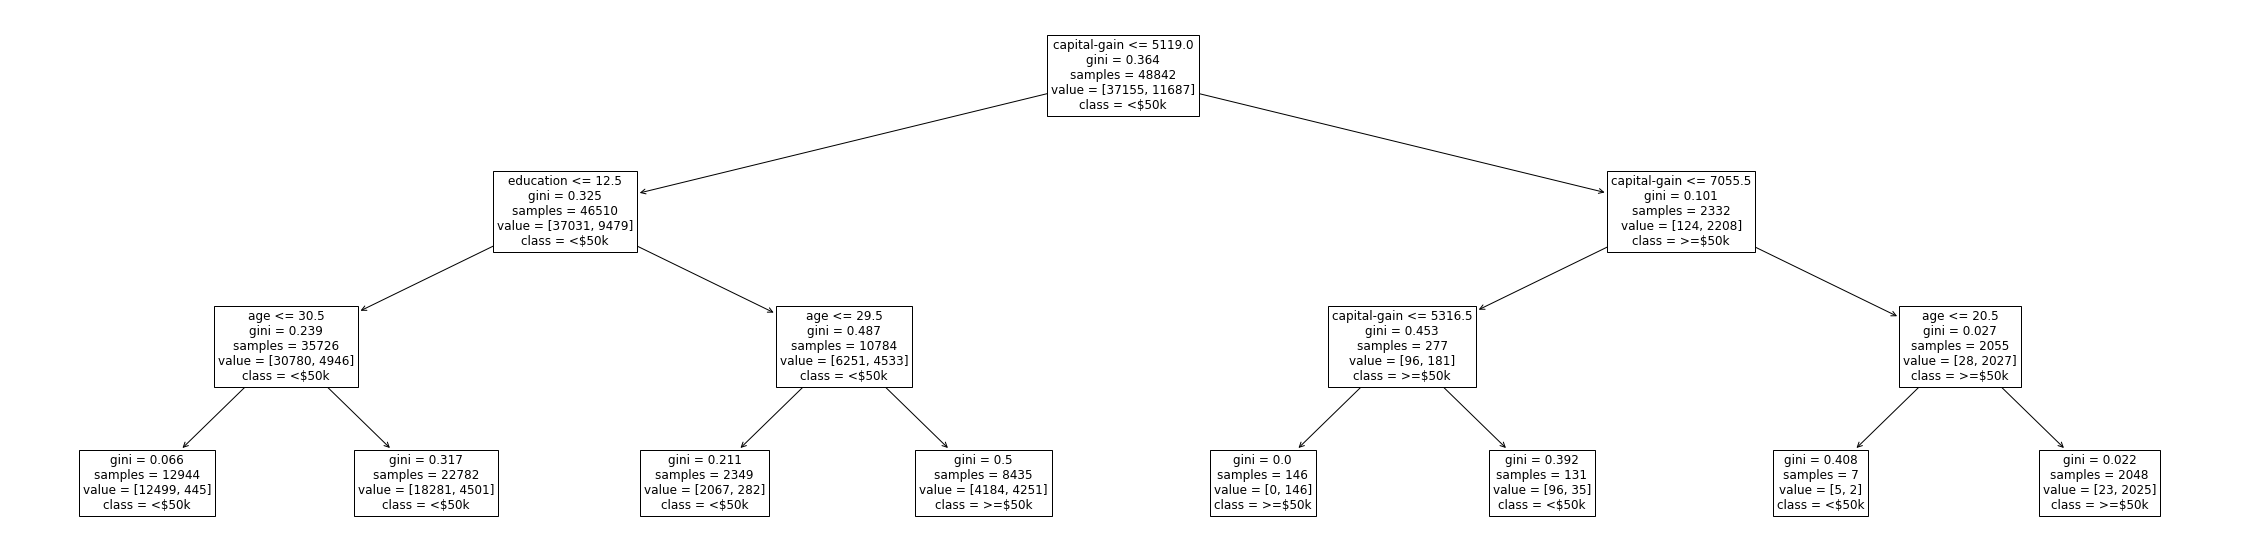

In [7]:
plt.figure(figsize=(40,10))
tree.plot_tree(clf, fontsize=12, feature_names=columns, class_names=["<$50k",">=$50k"])

In [8]:
class Node:
    def __init__(self, leaf, feature, value):
        self.leaf = leaf
        self.feature = feature
        self.value = value
        self.greater_node = None
        self.less_node = None
    
    def add_greater_node(self, greater_node):
        self.greater_node = greater_node

    def add_less_node(self, less_node):
        self.less_node = less_node
    
    def is_leaf(self):
        return self.leaf != None

    def __repr__(self):
        if self.is_leaf():
            return "{class="+str(self.leaf)+"}"
        return "{<="+str(self.value)+":"+str(self.less_node)+",>"+str(self.value)+":"+str(self.greater_node)+"}"
    
    def __str__(self):
        if self.is_leaf():
            return "{class="+str(self.leaf)+"}"
        return "{<="+str(self.value)+":"+str(self.less_node)+",>"+str(self.value)+":"+str(self.greater_node)+"}"
    
    def export_json(self):
        if self.is_leaf():
            return {"class":self.leaf}
        return {str(self.feature)+"<="+str(self.value):self.less_node.export_json(), str(self.feature)+">"+str(self.value):self.greater_node.export_json()}

In [9]:
def export_dict(clf):
    return export_dict_rec(tree.export_text(clf)[0:-1])
def export_dict_rec(tree_text):
    # print(tree_text,'\n')
    # print('1\n')
    if tree_text[0:12] == "|--- class: " or tree_text.find("feature") == -1:
        # print('leaf',tree_text)
        return Node(float(tree_text[12:]), None, None)
    tree_text = tree_text.replace("|--- feature_", "", 1)
    tree_text = tree_text.replace("\n|--- feature_", "\n", 1)
    tree_text = tree_text.replace("\n|   ", "\n")
    # print()
    # print(tree_text)
    features = []
    feature = ""
    for letter in tree_text:
        if letter == " " or letter == "\n":
            features.append(feature)
            feature = ""
            if letter == "\n":
                break
        else:
            feature+=letter    
    # print(tree_text,'\n')

    # number_lines = tree_text.count("\n")
    # occurance = number_lines//2+2
    # # print("occurance:", occurance, " number of lines:", number_lines)
    # start = tree_text.find("\n")+1
    # val = -1
    # for i in range(0, occurance-1):
    #     val = tree_text.find("\n", val+1)
    # end_start = val
    # val = tree_text.find("\n", val+1)
    # end = val+1 
    start = tree_text.find("\n")
    start_end = tree_text.find("\n"+tree_text[0])
    end = start_end+tree_text[start_end:].find("\n|")
    # if start == 0:
    #     start = tree_text.find("\n|--- class: ")+1
    #     end = tree_text.find("\n|--- class: ", start)+1  
    # print(features,"\n",start,end) 
    tree = Node(None, int(features[0]), float(features[-1]))
    tree.add_less_node(export_dict_rec(tree_text[start+1:start_end]))
    tree.add_greater_node(export_dict_rec(tree_text[end+1:]))
    return tree




In [10]:
# tree_text = tree.export_text(clf2)
# tree_dict = export_dict_rec(tree_text[0:-1])
tree_dict = export_dict(clf)
print(tree_dict.export_json())

{'4<=5119.0': {'1<=12.5': {'0<=30.5': {'class': 0.0}, '0>30.5': {'class': 0.0}}, '1>12.5': {'0<=29.5': {'class': 0.0}, '0>29.5': {'class': 1.0}}}, '4>5119.0': {'4<=7055.5': {'4<=5316.5': {'class': 1.0}, '4>5316.5': {'class': 0.0}}, '4>7055.5': {'0<=20.5': {'class': 0.0}, '0>20.5': {'class': 1.0}}}}


In [11]:
clf2 = tree.DecisionTreeClassifier(max_depth=4)
clf2 = clf2.fit(X, y)
print(tree.export_text(clf2))
# tree_dict = export_dict(clf2)
# print(tree_dict.export_json())

|--- feature_4 <= 5119.00
|   |--- feature_1 <= 12.50
|   |   |--- feature_0 <= 30.50
|   |   |   |--- feature_0 <= 24.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  24.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  30.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_1 >  12.50
|   |   |--- feature_0 <= 29.50
|   |   |   |--- feature_0 <= 27.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  27.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  29.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|--- feature_4 >  5119.00
|   |--- feature_4 <= 7055.50
|   |   |--- feature_4 <= 5316.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  5316.50
|   |   |   |--- feature_0 <= 61.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  61.00
|   |   |   | 

In [13]:
tree_dict = export_dict(clf2)
print(tree_dict.export_json())

{'4<=5119.0': {'1<=12.5': {'0<=30.5': {'0<=24.5': {'class': 0.0}, '0>24.5': {'class': 0.0}}, '0>30.5': {'3<=0.5': {'class': 0.0}, '3>0.5': {'class': 0.0}}}, '1>12.5': {'0<=29.5': {'0<=27.5': {'class': 0.0}, '0>27.5': {'class': 0.0}}, '0>29.5': {'3<=0.5': {'class': 0.0}, '3>0.5': {'class': 1.0}}}}, '4>5119.0': {'4<=7055.5': {'4<=5316.5': {'class': 1.0}, '4>5316.5': {'0<=61.0': {'class': 0.0}, '0>61.0': {'class': 1.0}}}, '4>7055.5': {'0<=20.5': {'4<=24559.5': {'class': 1.0}, '4>24559.5': {'class': 0.0}}, '0>20.5': {'0<=60.5': {'class': 1.0}, '0>60.5': {'class': 1.0}}}}}
